<a href="https://colab.research.google.com/github/Zeenat85/Colab-Notebooks/blob/main/LOG_REG_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accessing the Google Drive for reading dataset

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Importing All required Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

Data Collection
Reading the suv dataset from google drive

In [ ]:
mydata1=pd.read_csv('/content/drive/My Drive/csv/suv_data.csv')
print(mydata1.shape)
mydata1.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


To check number of tuples in the dataset

In [ ]:
print("Number of Person purchased : "+str(len(mydata1.index)))

Number of Person purchased : 400


Data Analysis

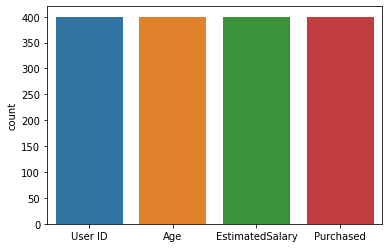

In [ ]:
sns.countplot( data=mydata1)

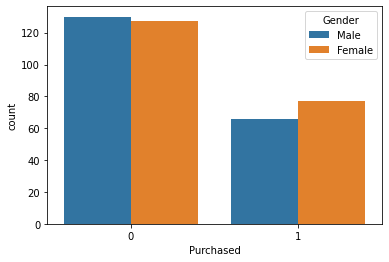

In [ ]:
sns.countplot(x='Purchased', hue='Gender' , data=mydata1)
plt.rcParams['figure.figsize'] = (10.0, 5.0)

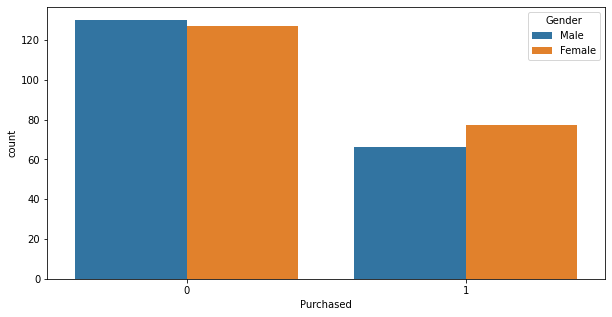

In [ ]:
sns.countplot(x='Purchased', hue='Gender' , data=mydata1)

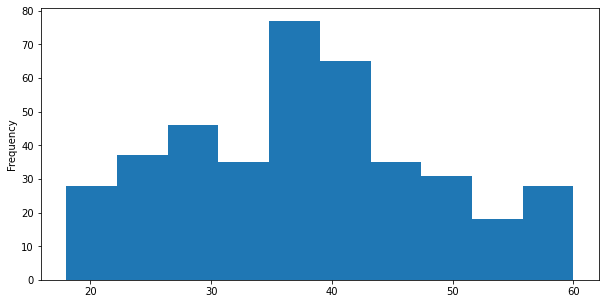

In [ ]:
#plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['figure.figsize'] = (10.0, 5.0)

mydata1['Age'].plot.hist()

In [ ]:
mydata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Data Wrangling
Idetifying Missing values

In [ ]:
mydata1.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [ ]:
mydata1.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

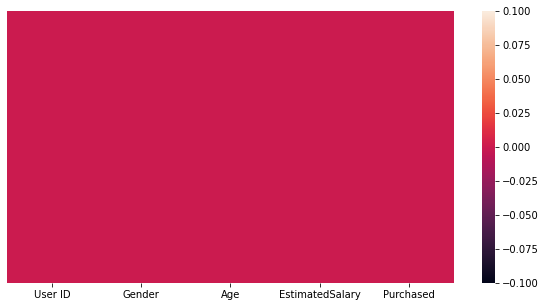

In [ ]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
sns.heatmap(mydata1.isnull(),yticklabels=False)

Box Plot


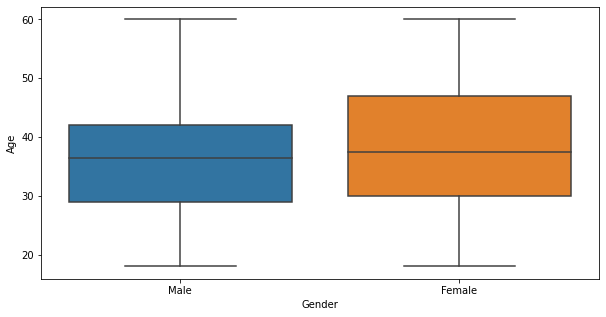

In [ ]:
sns.boxplot(x='Gender', y='Age', data=mydata1)

Droping the Column with NULL values

In [ ]:
sex =pd.get_dummies(mydata1['Gender'],drop_first=True)

In [ ]:
sex.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [ ]:
mydata1.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
mydata1=pd.concat([mydata1,sex],axis=1)

In [ ]:
mydata1.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [ ]:
mydata1.drop(['User ID','Gender'],axis=1,inplace=True)

In [ ]:
mydata1.head(5)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

x =mydata1.drop('Purchased', axis=1)
y =mydata1['Purchased']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
logmodel =LogisticRegression()
logmodel.fit(x_train, y_train)

predictions =logmodel.predict(x_test)
print('Classification Report')
print(classification_report(y_test, predictions))
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print('\n Accuracy Report')
print(accuracy_score(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.59      0.84      0.69        81
           1       0.24      0.08      0.12        51

    accuracy                           0.55       132
   macro avg       0.41      0.46      0.41       132
weighted avg       0.45      0.55      0.47       132

Confusion Matrix
[[68 13]
 [47  4]]

 Accuracy Report
0.5454545454545454
